In [1]:
import xml.etree.ElementTree as Xet
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
gdf = gpd.read_file("az_gen_20_prec.shp")
gdf.shape

(1489, 194)

In [6]:
pd.set_option('display.max_columns', None)
gdf.head(5)

,UNIQUE_ID,COUNTYFP,PCTNUM,PRECINCTNA,CDE_COUNTY,COUNTY_NAM,CON_DIST,SLDL_DIST,SLDU_DIST,G20PREDBID,G20PRELJOR,G20PRERTRU,G20USSDKEL,G20USSRMCS,GCON01DOHA,GCON01RSHE,GCON02DKIR,GCON02RMAR,GCON03DGRI,GCON03RWOO,GCON04DDIS,GCON04RGOS,GCON05DGRE,GCON05RBIG,GCON06DTIP,GCON06RSCH,GCON07DGAL,GCON07RBAR,GCON08DMUS,GCON08RLES,GCON09DSTA,GCON09RGIL,G20SSCNBRU,G20SSCNGOU,G20SSCNLOP,G20SSCYBRU,G20SSCYGOU,G20SSCYLOP,G20COCDMUN,G20COCDSTA,G20COCDTOV,G20COCRMAR,G20COCROCO,G20COCRSLO,G20PRO207N,G20PRO207Y,G20PRO208N,G20PRO208Y,GSU01DCAR,GSU01RFAN,GSU02DGAB,GSU02RWOR,GSU03DGON,GSU04DOTO,GSU04RANG,GSU05RBOR,GSU06DFRE,GSU06RROG,GSU07DPES,GSU08DMCG,GSU08RSHO,GSU09DSTE,GSU10DENG,GSU10RWAD,GSU11DMEN,GSU11RLEA,GSU12DROB,GSU12RPET,GSU13RKER,GSU14DKAR,GSU14RGOW,GSU15RBAR,GSU16RTOW,GSU17DKUR,GSU17RMES,GSU18DBOW,GSU18RSHA,GSU19DCHA,GSU20DERV,GSU20RBOY,GSU21RGRA,GSU22DTYR,GSU22RLIV,GSU23DBLA,GSU23RUGE,GSU24DALS,GSU24RMIC,GSU25DWEI,GSU25RPAC,GSU26DMEN,GSU26RCHI,GSU27DRIO,GSU27RSHR,GSU28DMAR,GSU28RBRO,GSU29DQUE,GSU29RWIL,GSU30DNAV,GSL01DSTA,GSL01RBUR,GSL01RNGU,GSL02DDAL,GSL02DHER,GSL02RMCE,GSL03DCAN,GSL03DHER,GSL04DFER,GSL04DPET,GSL04RJOH,GSL05RBIA,GSL05RCOB,GSL06DEVA,GSL06IBAB,GSL06RBAR,GSL06RBLA,GSL07DTEL,GSL07DTSO,GSL07RPAR,GSL07RPEE,GSL08DGIR,GSL08RCOO,GSL08RPRA,GSL09DFRI,GSL09DPOW,GSL09RLYO,GSL10DDEG,GSL10DSTA,GSL10RGUM,GSL10RHIC,GSL11DPER,GSL11RFIN,GSL11RROB,GSL12RGRA,GSL12RHOF,GSL13DSAN,GSL13RDUN,GSL13ROSB,GSL14DBEA,GSL14DMAE,GSL14RGRI,GSL14RNUT,GSL15DDYB,GSL15RKAI,GSL15RWIL,GSL16DHUN,GSL16RFIL,GSL16RPAR,GSL17DPAW,GSL17RHAR,GSL17RWEN,GSL18DEPS,GSL18DJER,GSL18RHAW,GSL18RROB,GSL19DESP,GSL19DSIE,GSL20DSCH,GSL20RBOL,GSL20RKER,GSL21DKNE,GSL21RPAY,GSL21RPIN,GSL22DGAR,GSL22DHON,GSL22RCAR,GSL22RTOM,GSL23DKUR,GSL23RCHA,GSL23RKAV,GSL24DLON,GSL24DSHA,GSL24RALG,GSL24RCUS,GSL25DHUG,GSL25RBOW,GSL25RUDA,GSL26DHER,GSL26DSAL,GSL26RLOU,GSL26RSIF,GSL27DBOL,GSL27DROD,GSL27RPEÑ,GSL28DBUT,GSL28DLIE,GSL28RBOW,GSL28RJAC,GSL29DAND,GSL29DCHA,GSL29RBRA,GSL29RFOK,GSL30DMEZ,GSL30DTER,geometry
0,02 ALPINE,001,AP0002,ALPINE,AP,Apache,01,07,07,94.0,5.0,283.0,98.0,284.0,105.0,271.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71,73,81,237,236,228,91.0,76.0,86.0,242.0,257.0,233.0,207.0,168.0,260.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,87.0,252.0,251.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-109.49567 33.65280, -109.49576 33.6..."
1,03 CANYON DE CHELLY,001,AP0003,CANYON DE CHELLY,AP,Apache,01,07,07,1982.0,30.0,273.0,1995.0,290.0,1964.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,564,558,558,1608,1613,1610,1213.0,1329.0,1322.0,174.0,210.0,196.0,1154.0,1010.0,726.0,1431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1504.0,1700.0,133.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-109.71666 36.26151, -109.71658 36.2..."
2,05 CHINLE,001,AP0005,CHINLE,AP,Apache,01,07,07,989.0,20.0,148.0,994.0,157.0,964.0,171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326,323,302,731,734,753,639.0,611.0,720.0,100.0,125.0,126.0,476.0,634.0,302.0,807.0,0

In [8]:
# Extract the 7th character from each entry in the 'G20PREDBID' column
gdf['G20PREDBID'] = gdf['G20PREDBID'].dropna().astype(str)
seventh_chars = gdf['G20PREDBID'].str[6]

# Find the unique characters at the 7th position
unique_seventh_chars = seventh_chars.unique()

# Number of unique characters
num_unique_seventh_chars = len(unique_seventh_chars)

print(f"Unique characters at the 7th position: {unique_seventh_chars}")
print(f"Number of unique characters at the 7th position: {num_unique_seventh_chars}")

Unique characters at the 7th position: [nan]
Number of unique characters at the 7th position: 1


In [4]:
gdf.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'PCTNUM', 'PRECINCTNA', 'CDE_COUNTY',
       'COUNTY_NAM', 'CON_DIST', 'SLDL_DIST', 'SLDU_DIST', 'G20PREDBID',
       ...
       'GSL28DLIE', 'GSL28RBOW', 'GSL28RJAC', 'GSL29DAND', 'GSL29DCHA',
       'GSL29RBRA', 'GSL29RFOK', 'GSL30DMEZ', 'GSL30DTER', 'geometry'],
      dtype='object', length=194)

<Axes: >

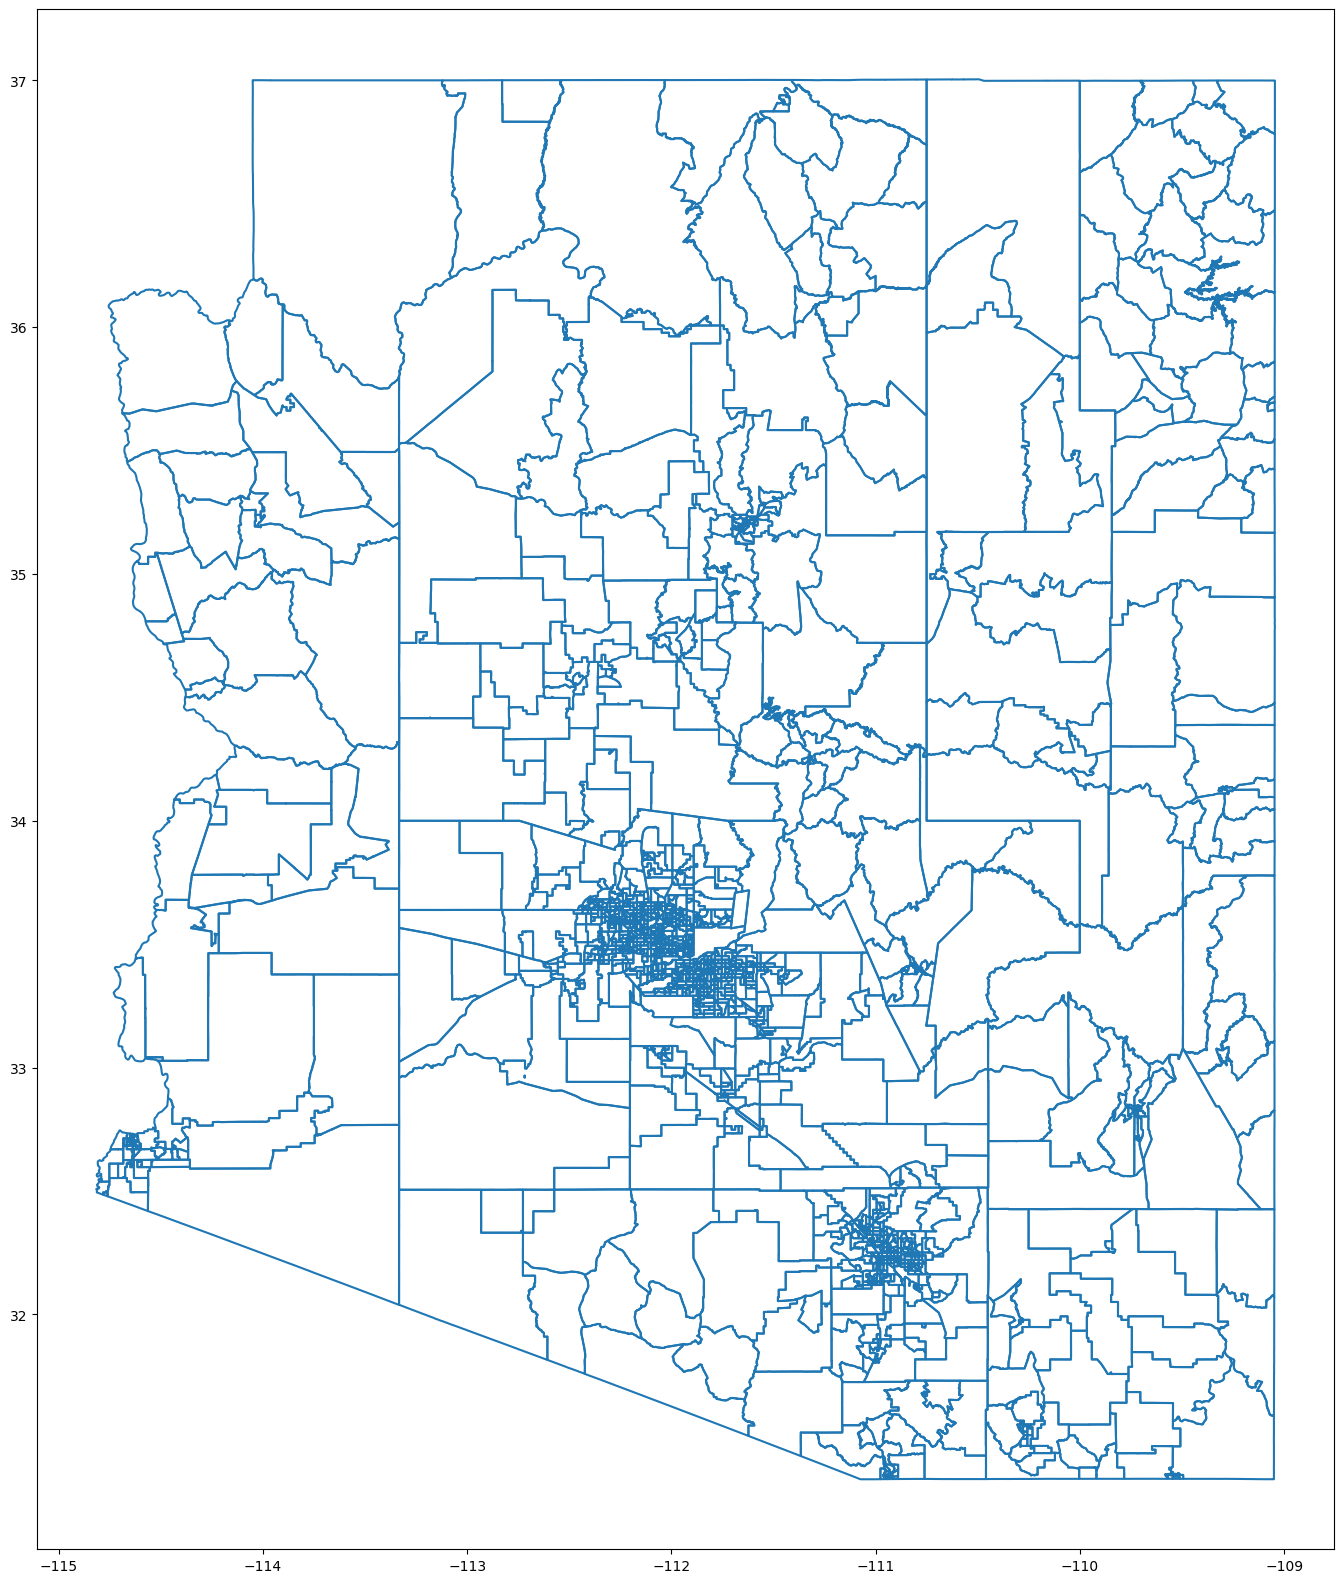

In [3]:
gdf.boundary.plot(figsize = (20,20))